In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
df = pd.read_csv('diabetes.csv')
matrix = df.values

features = matrix[:, :8]
targets = matrix[:, 8]

skf = model_selection.StratifiedKFold(n_splits=5)

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


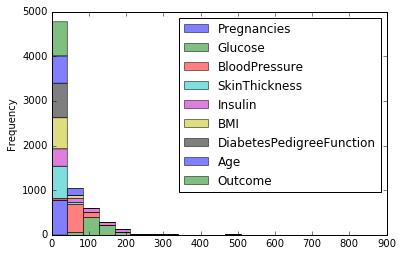

In [4]:
df.plot.hist(stacked=True, alpha=0.5, bins=20)

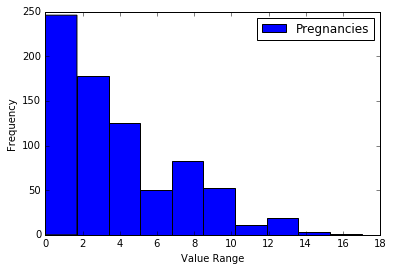

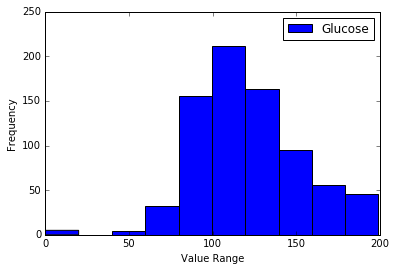

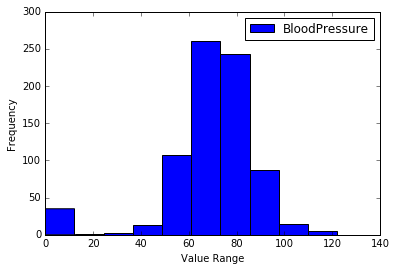

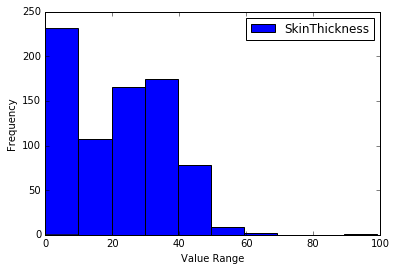

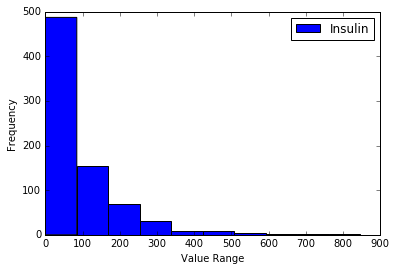

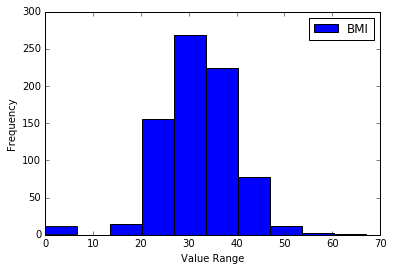

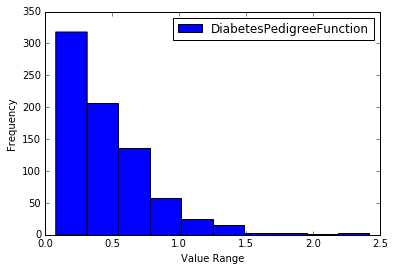

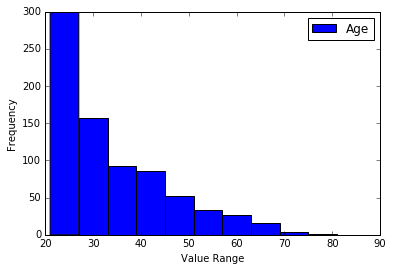

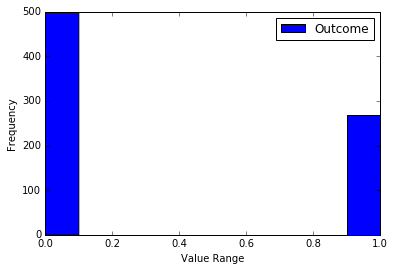

In [5]:
vals = df.columns.tolist()
for v in vals:
    plt.hist(df[v])
    plt.xlabel('Value Range') 
    plt.ylabel('Frequency')
    plt.legend([v])
    plt.show()

In [7]:
logistic_regr_model = LogisticRegression()
linear_regr_model = LinearRegression()
LDA_model = LinearDiscriminantAnalysis()

knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()
svm_model = SVC(kernel='linear')

logistic_regr_scores = model_selection.cross_val_score(logistic_regr_model, features, targets, cv=skf)
linear_regr_scores = model_selection.cross_val_score(linear_regr_model, features, targets, cv=skf)
LDA_scores = model_selection.cross_val_score(LDA_model, features, targets, cv=skf)

knn_scores = model_selection.cross_val_score(knn_model, features, targets, cv=skf)
nb_scores = model_selection.cross_val_score(nb_model, features, targets, cv=skf)
decision_tree_scores = model_selection.cross_val_score(decision_tree_model, features, targets, cv=skf)
svm_scores = model_selection.cross_val_score(svm_model, features, targets, cv=skf)

//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


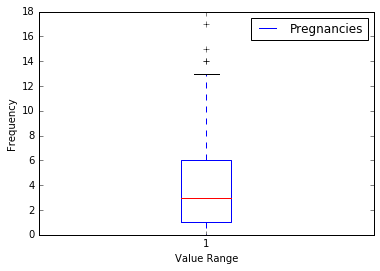

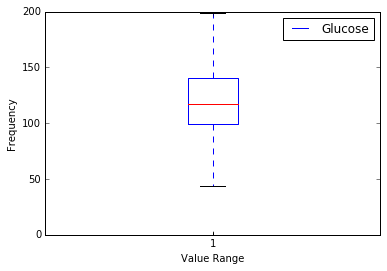

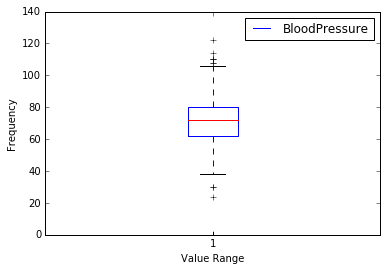

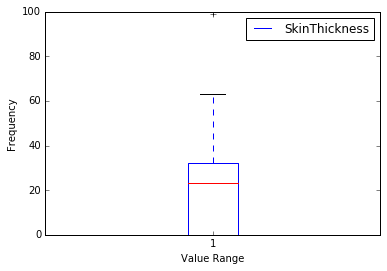

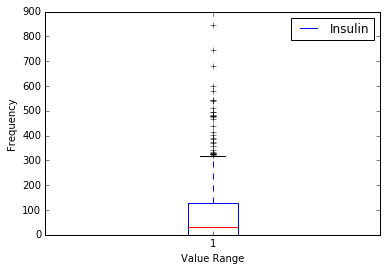

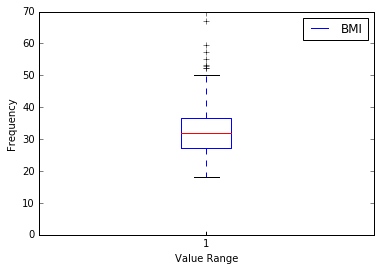

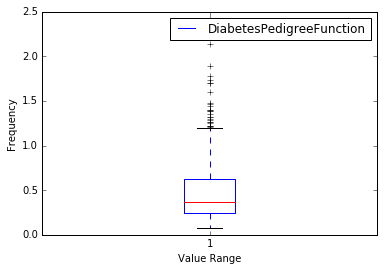

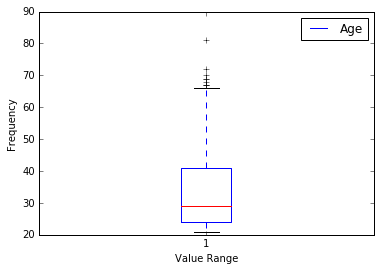

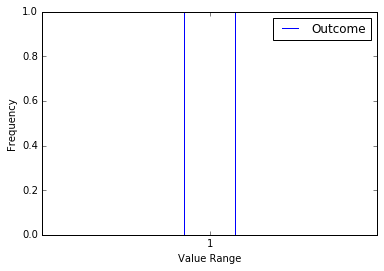

In [177]:
#pd.DataFrame.boxplot(df, figsize=(10, 10))
vals = df.columns.tolist()
for v in vals:
    plt.boxplot(df[v])
    plt.xlabel('Value Range') 
    plt.ylabel('Frequency')
    plt.legend([v])
    plt.show()

In [8]:
avg_logistic_regr_scores = logistic_regr_scores.mean()
avg_linear_regr_scores = linear_regr_scores.mean()
avg_LDA_scores = LDA_scores.mean()

avg_knn_scores = knn_scores.mean()
avg_nb_scores = nb_scores.mean()
avg_decision_tree_scores = decision_tree_scores.mean()
avg_svm_scores = svm_scores.mean()

In [9]:
print 'Linear Model:'
print 'Logistic Regression Score: %s' % logistic_regr_scores.mean()
print 'Linear Regression Score: %s' % linear_regr_scores.mean()
print 'LDA Score: %s' % LDA_scores.mean()
print '=================='
print 'Non-Linear Model:'
print 'KNN Score: %s' % knn_scores.mean()
print 'Naive Bayes Score: %s' % nb_scores.mean()
print 'Decision Tree Score: %s' % decision_tree_scores.mean()
print 'SVM Score: %s' % svm_scores.mean()

Linear Model:
Logistic Regression Score: 0.768270944742
Linear Regression Score: 0.28733735982
LDA Score: 0.768296409473
Non-Linear Model:
KNN Score: 0.723979288685
Naive Bayes Score: 0.751336898396
Decision Tree Score: 0.708445802563
SVM Score: 0.765682030388


In [5]:
df[:1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


### Question: which features are most (or least) correlated to the outcome?

In [7]:
df = pd.read_csv('diabetes.csv')
matrix = df.values

for i in xrange(8):
    print 'Removed feature # %d' % i
    remaining_features = np.delete(features, np.s_[i], 1)
    logistic_regr_scores = model_selection.cross_val_score(logistic_regr_model, remaining_features, targets, cv=skf)
    linear_regr_scores = model_selection.cross_val_score(linear_regr_model, remaining_features, targets, cv=skf)
    LDA_scores = model_selection.cross_val_score(LDA_model, remaining_features, targets, cv=skf)
    knn_scores = model_selection.cross_val_score(knn_model, remaining_features, targets, cv=skf)
    nb_scores = model_selection.cross_val_score(nb_model, remaining_features, targets, cv=skf)
    decision_tree_scores = model_selection.cross_val_score(knn_model, remaining_features, targets, cv=skf)
    svm_scores = model_selection.cross_val_score(svm_model, remaining_features, targets, cv=skf)
    
    print 'Logistic Regression Score: %s; Differential to avg: %s' % (logistic_regr_scores.mean(), logistic_regr_scores.mean() - avg_logistic_regr_scores)
    print 'Linear Regression Score: %s; Differential to avg: %s' % (linear_regr_scores.mean(), linear_regr_scores.mean() - avg_linear_regr_scores)
    print 'LDA Score: %s; Differential to avg: %s' % (LDA_scores.mean(), LDA_scores.mean() - avg_LDA_scores)
    print 'KNN Score: %s; Differential to avg: %s' % (knn_scores.mean(), knn_scores.mean() - avg_knn_scores)
    print 'Naive Bayes Score: %s; Differential to avg: %s' % (nb_scores.mean(), nb_scores.mean() - avg_nb_scores)
    print 'Decision Tree Score: %s; Differential to avg: %s' % (decision_tree_scores.mean(), decision_tree_scores.mean() - avg_decision_tree_scores)
    print 'SVM Score: %s; Differential to avg: %s' % (svm_scores.mean(), svm_scores.mean() - avg_svm_scores)
    print '\n'

Removed feature # 0
Logistic Regression Score: 0.765690518632; Differential to avg: -0.00258042610984
Linear Regression Score: 0.273420732278; Differential to avg: -0.0139166275429
LDA Score: 0.774789915966; Differential to avg: 0.00649350649351
KNN Score: 0.722646634411; Differential to avg: -0.00133265427383
Naive Bayes Score: 0.752635599694; Differential to avg: 0.0012987012987
Decision Tree Score: 0.722646634411; Differential to avg: 0.0142178083355
SVM Score: 0.776097105509; Differential to avg: 0.010415075121


Removed feature # 1
Logistic Regression Score: 0.699219081572; Differential to avg: -0.0690518631695
Linear Regression Score: 0.165829169329; Differential to avg: -0.121508190491
LDA Score: 0.69142687378; Differential to avg: -0.0768695356931
KNN Score: 0.668033273916; Differential to avg: -0.0559460147695
Naive Bayes Score: 0.701858925388; Differential to avg: -0.0494779730074
Decision Tree Score: 0.668033273916; Differential to avg: -0.0403955521603
SVM Score: 0.68881249

In [10]:
from sklearn.feature_selection import SelectKBest

features_new = SelectKBest(k=3).fit_transform(features, targets)

In [244]:
features_new

array([[ 148. ,   33.6,   50. ],
       [  85. ,   26.6,   31. ],
       [ 183. ,   23.3,   32. ],
       ..., 
       [ 121. ,   26.2,   30. ],
       [ 126. ,   30.1,   47. ],
       [  93. ,   30.4,   23. ]])

In [179]:
features_new_2 = SelectKBest(k=5).fit_transform(features, targets)

In [180]:
features_new_2

array([[   6.   ,  148.   ,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   30.4  ,    0.315,   23.   ]])

As we can see, the top 3 most important features are respectively: Glucose, BMI, and Age

### Question: What features are most correlated to one another (you can use linear regression for this)?

In [9]:
df[:1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


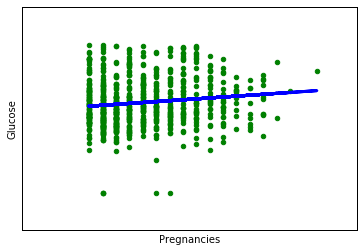

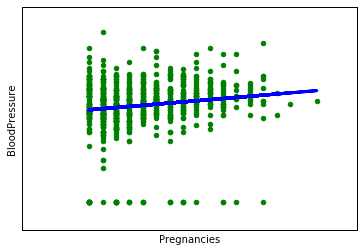

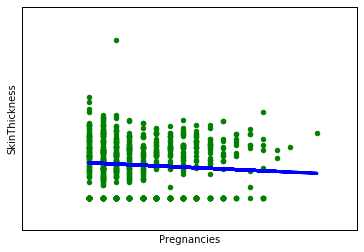

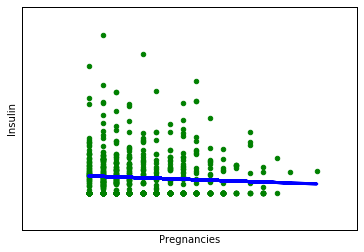

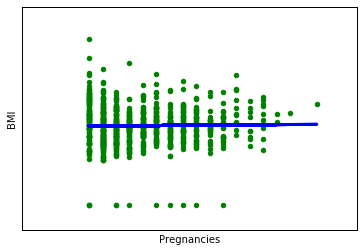

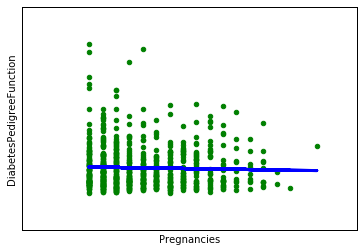

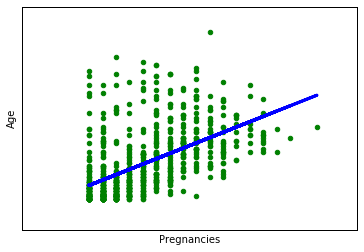

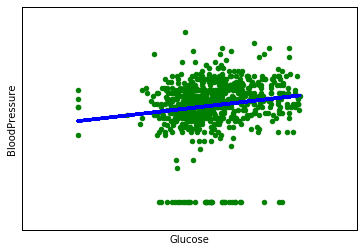

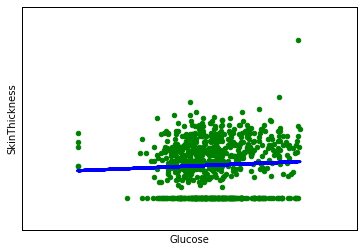

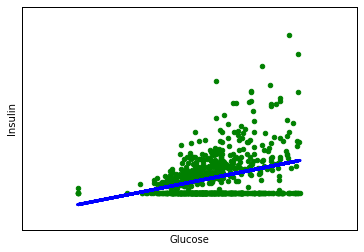

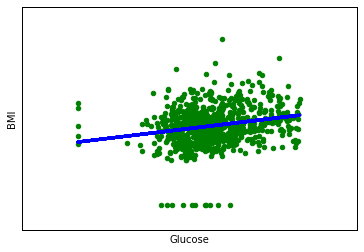

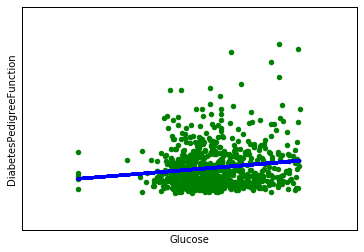

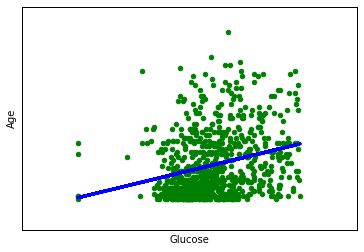

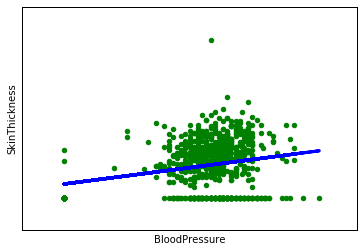

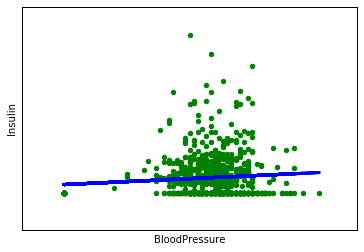

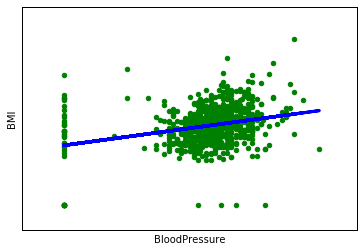

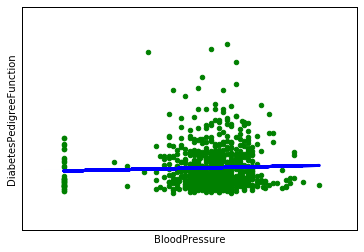

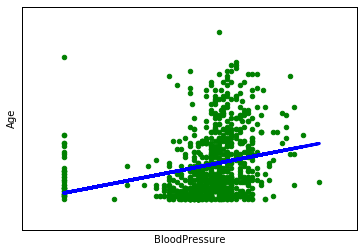

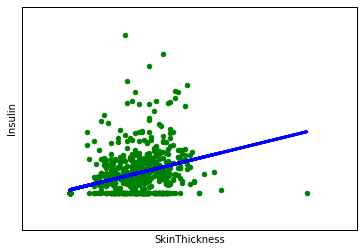

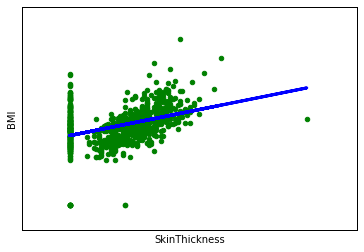

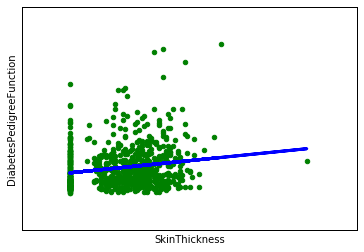

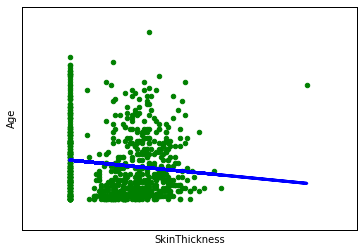

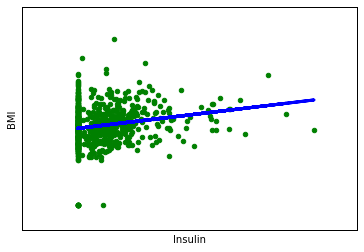

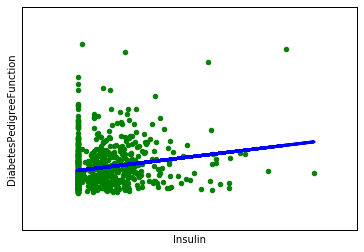

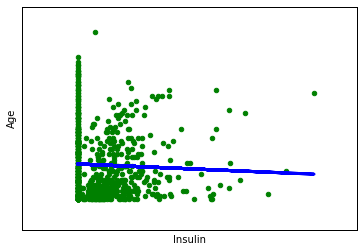

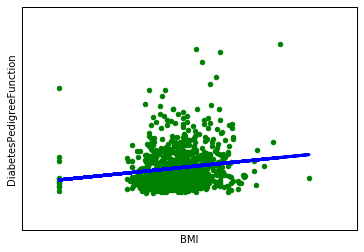

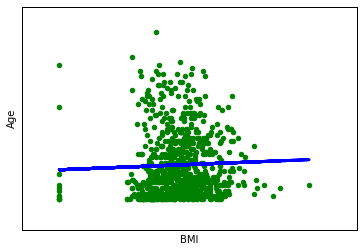

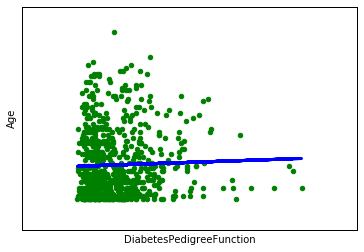

In [11]:
# Plot: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

col_names = df.columns.tolist()
for i in xrange(8):
    for j in xrange(8):
        if i >= j: continue
        f = features[:, [i]]
        t = features[:, [j]]
        clf = LinearRegression()
        clf.fit(f, t)
        
        # Plot outputs
        plt.scatter(f, t,  color='green')
        plt.plot(f, clf.predict(f), color='blue',
                 linewidth=3)
        plt.xlabel(col_names[i])
        plt.ylabel(col_names[j])
        plt.xticks(())
        plt.yticks(())

        plt.show()
        
        #print clf.coef_
        #print 'Feature pair (%s, %s). Score is: %f' % (col_names[i], col_names[j], clf.score(f, targets))

### Question: If you apply a clustering algorithm to this data, can you separate the instances belonging to the two different classes effectively?

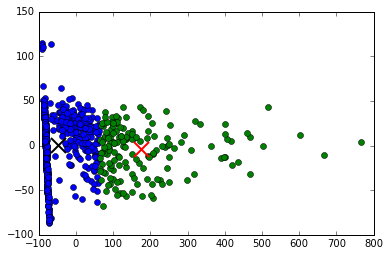

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot

# http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html

reduced_data = PCA(n_components=2).fit_transform(features)

kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(reduced_data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# blue - no diabetes; green - diabetes
colors=['blue','green'] 
centroid_colors = ['black', 'red']

for i in range(2):
    
    # select only data observations with cluster label == i
    ds = reduced_data[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o', color=colors[i])
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx', color=centroid_colors[i])
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

### Using SMOTE to balanced the Dataset

In [13]:
# http://contrib.scikit-learn.org/imbalanced-learn/generated/imblearn.over_sampling.SMOTE.html
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
features_balanced, targets_balanced = sm.fit_sample(features, targets)
Counter(targets_balanced)

Counter({0.0: 500, 1.0: 500})

### Tuning: Using Gridsearchcv to tune the models' hyper-parameters

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

logistic_regr_model_tune = LogisticRegression()
linear_regr_model_tune = LinearRegression()
LDA_model_tune = LinearDiscriminantAnalysis()

knn_model_tune = KNeighborsClassifier()
nb_model_tune = GaussianNB()
decision_tree_model_tune = DecisionTreeClassifier()
svm_model_tune = SVC(kernel='rbf')

#=====================

logistic_params = {'C': [0.1, 1, 10, 100, 1000], 'class_weight':['balanced', None], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
clf = GridSearchCV(logistic_regr_model_tune, logistic_params, cv=5)
clf.fit(features_balanced, targets_balanced)
print 'Best params for Logistic Regression: %s\n' % clf.best_params_

#===================
# svm_param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.25, 0.125, 0.1, 0.01, 0.001], 'kernel': ['rbf','poly','sigmoid']},
# ]
# clf = GridSearchCV(svm_model_tune, param_grid=svm_param_grid, cv=skf_tune,n_jobs=2)
# clf.fit(features_balanced, targets_balanced)
# print 'Best params for SVM: %s' % clf.best_params_

#=====================
knn_params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'weights':['uniform','distance']}
clf = GridSearchCV(knn_model_tune, param_grid=knn_params, cv=5,n_jobs=2)
clf.fit(features_balanced, targets_balanced)
print 'Best params for KNN: %s\n' % clf.best_params_

#======================
decision_tree_params = {'criterion':['gini','entropy'], 'splitter':['best','random'],'max_depth': [2,4,8,16,32,64],'min_samples_split':[2,4,8,16,32,64], 'min_samples_leaf': [1,2,4,8,16], 'class_weight': ['balanced', None]}
clf = GridSearchCV(decision_tree_model_tune, param_grid=decision_tree_params, cv=5,n_jobs=2)
clf.fit(features_balanced, targets_balanced)
print 'Best params for Decision Tree: %s\n' % clf.best_params_

#=====================
# LDA_params = {'shrinkage':[None, 'auto'], 'n_components':[2,3,4]}
# clf = GridSearchCV(LDA_model_tune, param_grid=LDA_params, cv=5,n_jobs=2)
# clf.fit(features_balanced, targets_balanced)
# print 'Best params for LDA: %s\n' % clf.best_params_


Best params for Logistic Regression: {'C': 1, 'solver': 'liblinear', 'class_weight': 'balanced'}

Best params for KNN: {'n_neighbors': 1, 'weights': 'uniform'}

Best params for Decision Tree: {'splitter': 'best', 'min_samples_leaf': 1, 'criterion': 'gini', 'min_samples_split': 2, 'max_depth': 4, 'class_weight': 'balanced'}



### Further Optimization: Using Ensembling Models

In [113]:
# http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import model_selection

clf1 = KNeighborsClassifier(n_neighbors=8, weights='distance', algorithm='auto')
clf2 = RandomForestClassifier()
clf3 = GaussianNB([.5, .5])
clf4 = LinearDiscriminantAnalysis()
clf5 = BaggingClassifier()
#clf6 = AdaBoostClassifier()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=LogisticRegression())

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, sclf], 
                      ['KNN', 
                       'Random Tree Forest', 
                       'Gaussian Naive Bayes',
                       'LDA',
                       'Bagging Classifier',
                       'StackingClassifier',
                       ]):

    scores = model_selection.cross_val_score(clf, features_balanced, targets_balanced, 
                                              cv=5)
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.782 (+/- 0.03) [KNN]
Accuracy: 0.790 (+/- 0.07) [Random Tree Forest]
Accuracy: 0.740 (+/- 0.02) [Gaussian Naive Bayes]
Accuracy: 0.756 (+/- 0.03) [LDA]
Accuracy: 0.798 (+/- 0.08) [Bagging Classifier]
Accuracy: 0.831 (+/- 0.06) [StackingClassifier]


In [126]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix

stacking_model = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=LogisticRegression())
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5)
trains_features = []
trains_targets = []
tests_features = []
tests_targets = []
for train_index, test_index in sss.split(features_balanced, targets_balanced):
    trains_features.append(features_balanced[train_index])
    trains_targets.append(targets_balanced[train_index])
    tests_features.append(features_balanced[test_index])
    tests_targets.append(targets_balanced[test_index])

stacking_model.fit(trains_features[0], trains_targets[0])
predictions = stacking_model.predict(tests_features[0])

print('Classification Report Stacking Model:\n')
print(classification_report(tests_targets[0], predictions))
print('Confusion Matrix Stacking Model: \n')
print(confusion_matrix(tests_targets[0], predictions, labels=[0, 1]))

Classification Report Stacking Model:

             precision    recall  f1-score   support

        0.0       0.82      0.85      0.84       250
        1.0       0.84      0.82      0.83       250

avg / total       0.83      0.83      0.83       500

Confusion Matrix Stacking Model: 

[[212  38]
 [ 45 205]]


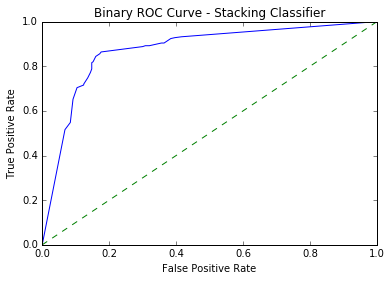

In [137]:
# Example referred to: http://scikit-learn.org/0.15/auto_examples/plot_roc.html
from sklearn.metrics import roc_curve, auc

probabilities = stacking_model.predict_proba(tests_features[0])
scores = []
for [i, j] in probabilities:
    scores.append(j)
y_scores = np.array(scores)
fpr, tpr, thresholds = roc_curve(tests_targets[0], y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0, 1.])
plt.ylim([0.0, 1.])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve - Stacking Classifier')
plt.legend(loc="lower right")
plt.show()

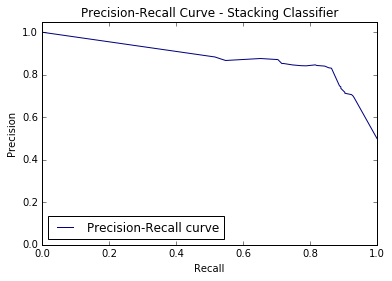

In [150]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(tests_targets[0], y_scores, pos_label=1)
average_precision = average_precision_score(tests_targets[0], y_scores)

# Example referred to: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - Stacking Classifier')
plt.legend(loc="lower left")
plt.show()

In [146]:
gaussianNB = GaussianNB()
gaussianNB.fit(trains_features[0], trains_targets[0])
predictions = gaussianNB.predict(tests_features[0])

print('Classification Report Gaussian Naive Bayes Model:\n')
print(classification_report(tests_targets[0], predictions))
print('Confusion Matrix Gaussian Naive Bayes Model: \n')
print(confusion_matrix(tests_targets[0], predictions, labels=[0, 1]))

Classification Report Gaussian Naive Bayes Model:

             precision    recall  f1-score   support

        0.0       0.72      0.84      0.77       250
        1.0       0.80      0.68      0.73       250

avg / total       0.76      0.76      0.75       500

Confusion Matrix Gaussian Naive Bayes Model: 

[[209  41]
 [ 81 169]]


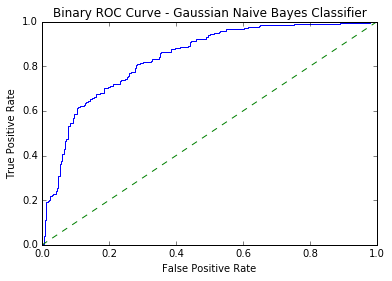

In [148]:
probabilities = gaussianNB.predict_proba(tests_features[0])
scores = []
for [i, j] in probabilities:
    scores.append(j)
y_scores_dt = np.array(scores)
fpr, tpr, thresholds = roc_curve(tests_targets[0], y_scores_dt, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0, 1.])
plt.ylim([0.0, 1.])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve - Gaussian Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

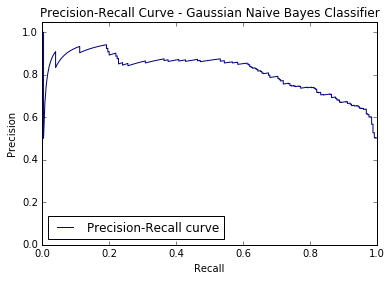

In [151]:
precision, recall, thresholds = precision_recall_curve(tests_targets[0], y_scores_dt, pos_label=1)
average_precision = average_precision_score(tests_targets[0], y_scores_dt)

# Example referred to: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - Gaussian Naive Bayes Classifier')
plt.legend(loc="lower left")
plt.show()

In [154]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.6)
trains_features = []
trains_targets = []
tests_features = []
tests_targets = []
for train_index, test_index in sss.split(features_balanced, targets_balanced):
    trains_features.append(features_balanced[train_index])
    trains_targets.append(targets_balanced[train_index])
    tests_features.append(features_balanced[test_index])
    tests_targets.append(targets_balanced[test_index])
    
sclf.fit(trains_features[0], trains_targets[0])
probas = sclf.predict_proba(tests_features[0])
index = 0
arr = []
for p in probas:
    p = np.append(p, tests_targets[0][index])
    index += 1
    arr.append(list(p))
arr_np = np.array(arr)
class0_sorted = arr_np[arr_np[:,1].argsort()]
class1_sorted = arr_np[arr_np[:,0].argsort()]

#class0_sorted
class0_threshold_90 = [item for item in class0_sorted if item[0] >= .9]
class0_threshold_80 = [item for item in class0_sorted if item[0] >= .8]
class0_threshold_70 = [item for item in class0_sorted if item[0] >= .7]
class0_threshold_60 = [item for item in class0_sorted if item[0] >= .6]
class0_threshold_50 = [item for item in class0_sorted if item[0] >= .5]

class0_threshold_90_by_range = [item for item in class0_sorted if item[0] >= .9 and item[0] <= 1]
class0_threshold_80_by_range = [item for item in class0_sorted if item[0] >= .8 and item[0] < 0.9]
class0_threshold_70_by_range = [item for item in class0_sorted if item[0] >= .7 and item[0] < 0.8]
class0_threshold_60_by_range = [item for item in class0_sorted if item[0] >= .6 and item[0] < 0.7]
class0_threshold_50_by_range = [item for item in class0_sorted if item[0] >= .5 and item[0] < 0.6]

#class1_sorted
class1_threshold_90 = [item for item in class1_sorted if item[1] >= .9]
class1_threshold_80 = [item for item in class1_sorted if item[1] >= .8]
class1_threshold_70 = [item for item in class1_sorted if item[1] >= .7]
class1_threshold_60 = [item for item in class1_sorted if item[1] >= .6]
class1_threshold_50 = [item for item in class1_sorted if item[1] >= .5]

class1_threshold_90_by_range = [item for item in class0_sorted if item[1] >= .9 and item[1] <= 1]
class1_threshold_80_by_range = [item for item in class0_sorted if item[1] >= .8 and item[1] < 0.9]
class1_threshold_70_by_range = [item for item in class0_sorted if item[1] >= .7 and item[1] < 0.8]
class1_threshold_60_by_range = [item for item in class0_sorted if item[1] >= .6 and item[1] < 0.7]
class1_threshold_50_by_range = [item for item in class0_sorted if item[1] >= .5 and item[1] < 0.6]

incorrect = 0
print 'Predicting Healthy:'

for i in class0_threshold_90_by_range:
    if i[2] != 0: incorrect += 1
if len(class0_threshold_90_by_range) > 0:
    print 'Accuracy for threshold 90 - 100 percent is %s' % (1 - float(incorrect)/len(class0_threshold_90_by_range)) 
incorrect = 0
for i in class0_threshold_80_by_range:
    if i[2] != 0: incorrect += 1
if len(class0_threshold_80_by_range) > 0:
    print 'Accuracy for threshold 80 - 90 percent is %s' % (1 - float(incorrect)/len(class0_threshold_80_by_range)) 
incorrect = 0
for i in class0_threshold_70_by_range:
    if i[2] != 0: incorrect += 1
if len(class0_threshold_70_by_range) > 0:
    print 'Accuracy for threshold 70 - 80 percent is %s' % (1 - float(incorrect)/len(class0_threshold_70_by_range)) 
incorrect = 0
for i in class0_threshold_60_by_range:
    if i[2] != 0: incorrect += 1
if len(class0_threshold_60_by_range) > 0:
    print 'Accuracy for threshold 60 - 70 percent is %s' % (1 - float(incorrect)/len(class0_threshold_60_by_range)) 
incorrect = 0
for i in class0_threshold_50_by_range:
    if i[2] != 0: incorrect += 1
if len(class0_threshold_50_by_range) > 0:
    print 'Accuracy for threshold 50 - 60 percent is %s' % (1 - float(incorrect)/len(class0_threshold_50_by_range)) 


print '==========================\n'
incorrect = 0
print 'Predicting Diabetes:'

for i in class1_threshold_90_by_range:
    if i[2] != 1: incorrect += 1
if len(class1_threshold_90_by_range) > 0:
    print 'Accuracy for threshold 90 - 100 percent is %s' % (1 - float(incorrect)/len(class1_threshold_90_by_range)) 
incorrect = 0
for i in class1_threshold_80_by_range:
    if i[2] != 1: incorrect += 1
if len(class1_threshold_80_by_range) > 0:
    print 'Accuracy for threshold 80 - 90 percent is %s' % (1 - float(incorrect)/len(class1_threshold_80_by_range)) 
incorrect = 0
for i in class1_threshold_70_by_range:
    if i[2] != 1: incorrect += 1
if len(class1_threshold_70_by_range) > 0:
    print 'Accuracy for threshold 70 - 80 percent is %s' % (1 - float(incorrect)/len(class1_threshold_70_by_range)) 
incorrect = 0
for i in class1_threshold_60_by_range:
    if i[2] != 1: incorrect += 1
if len(class1_threshold_60_by_range) > 0:
    print 'Accuracy for threshold 60 - 70 percent is %s' % (1 - float(incorrect)/len(class1_threshold_60_by_range)) 
incorrect = 0
for i in class1_threshold_50_by_range:
    if i[2] != 1: incorrect += 1
if len(class1_threshold_50_by_range) > 0:
    print 'Accuracy for threshold 50 - 60 percent is %s' % (1 - float(incorrect)/len(class1_threshold_50_by_range)) 

Predicting Healthy:
Accuracy for threshold 90 - 100 percent is 0.887323943662
Accuracy for threshold 80 - 90 percent is 0.571428571429
Accuracy for threshold 70 - 80 percent is 0.571428571429
Accuracy for threshold 50 - 60 percent is 0.481481481481

Predicting Diabetes:
Accuracy for threshold 90 - 100 percent is 0.870833333333
Accuracy for threshold 80 - 90 percent is 0.54
Accuracy for threshold 70 - 80 percent is 0.5
Accuracy for threshold 60 - 70 percent is 0.666666666667
Accuracy for threshold 50 - 60 percent is 0.318181818182
